In [5]:
import pandas as pd
german_credit = pd.read_csv('/Users/yavuzselimsefunc/Desktop/ITU THIRD SEMESTER/Sefer_Hoca_Project/german_credit.csv')

In [6]:
german_credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
german_credit.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
german_credit["foreign_worker"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
#german_credit['account_check_status'].unique()
pd.get_dummies(german_credit['account_check_status'], prefix='account_check_status')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['account_check_status'], prefix='account_check_status',dtype=float)], axis=1)
german_credit[['account_check_status', 'account_check_status_< 0 DM', 'account_check_status_0 <= ... < 200 DM', 'account_check_status_no checking account','account_check_status_>= 200 DM / salary assignments for at least 1 year']]
german_credit.drop('account_check_status', axis=1,inplace = True)
#********************************************
#***************************************
#german_credit['credit_history'].unique()
pd.get_dummies(german_credit['credit_history'], prefix='credit_history')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['credit_history'], prefix='credit_history',dtype=float)], axis=1)
german_credit[['credit_history', 'credit_history_critical account/ other credits existing (not at this bank)', 'credit_history_existing credits paid back duly till now', 'credit_history_delay in paying off in the past','credit_history_no credits taken/ all credits paid back duly','credit_history_all credits at this bank paid back duly']]
german_credit.drop('credit_history', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['purpose'].unique()
pd.get_dummies(german_credit['purpose'], prefix='purpose')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['purpose'], prefix='purpose',dtype=float)], axis=1)
german_credit[['purpose', 
               'purpose_domestic appliances', 
               'purpose_(vacation - does not exist?)', 
               'purpose_radio/television',
               'purpose_car (new)',
               'purpose_car (used)','purpose_business',
               'purpose_repairs','purpose_education',
               'purpose_furniture/equipment',
               'purpose_retraining']]
german_credit.drop('purpose', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['savings'].unique()
pd.get_dummies(german_credit['savings'], prefix='savings')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['savings'], prefix='savings',dtype=float)], axis=1)
german_credit[['savings', 'savings_unknown/ no savings account', 'savings_... < 100 DM', 'savings_500 <= ... < 1000 DM ','savings_.. >= 1000 DM ','savings_100 <= ... < 500 DM']]
german_credit.drop('savings', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['present_emp_since'].unique()
pd.get_dummies(german_credit['present_emp_since'], prefix='present_emp_since')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['present_emp_since'], prefix='present_emp_since',dtype=float)], axis=1)
german_credit[['present_emp_since', 'present_emp_since_.. >= 7 years', 'present_emp_since_1 <= ... < 4 years', 'present_emp_since_4 <= ... < 7 years','present_emp_since_unemployed','present_emp_since_... < 1 year ']]
german_credit.drop('present_emp_since', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['personal_status_sex'].unique()
pd.get_dummies(german_credit['personal_status_sex'], prefix='personal_status_sex')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['personal_status_sex'], prefix='personal_status_sex',dtype=float)], axis=1)
german_credit[['personal_status_sex', 'personal_status_sex_male : single', 'personal_status_sex_female : divorced/separated/married', 'personal_status_sex_male : divorced/separated','personal_status_sex_male : married/widowed']]
german_credit.drop('personal_status_sex', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['other_debtors'].unique()
pd.get_dummies(german_credit['other_debtors'], prefix='other_debtors')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['other_debtors'], prefix='other_debtors',dtype=float)], axis=1)
german_credit[['other_debtors', 'other_debtors_none', 'other_debtors_guarantor', 'other_debtors_co-applicant']]
german_credit.drop('other_debtors', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['property'].unique()
pd.get_dummies(german_credit['property'], prefix='property')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['property'], prefix='property',dtype=float)], axis=1)
german_credit[['property', 'property_real estate', 'property_if not A121 : building society savings agreement/ life insurance', 'property_unknown / no property','property_if not A121/A122 : car or other, not in attribute 6']]
german_credit.drop('property', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['other_installment_plans'].unique()
pd.get_dummies(german_credit['other_installment_plans'], prefix='other_installment_plans')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['other_installment_plans'], prefix='other_installment_plans',dtype=float)], axis=1)
german_credit[['other_installment_plans', 'other_installment_plans_none', 'other_installment_plans_bank', 'other_installment_plans_stores']]
german_credit.drop('other_installment_plans', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['housing'].unique()
pd.get_dummies(german_credit['housing'], prefix='housing')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['housing'], prefix='housing',dtype=float)], axis=1)
german_credit[['housing', 'housing_own', 'housing_for free', 'housing_rent']]
german_credit.drop('housing', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['job'].unique()
pd.get_dummies(german_credit['job'], prefix='job')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['job'], prefix='job',dtype=float)], axis=1)
german_credit[['job', 
               'job_skilled employee / official', 'job_unskilled - resident', 
               'job_management/ self-employed/ highly qualified employee/ officer', 
               'job_unemployed/ unskilled - non-resident']]
german_credit.drop('job', axis=1,inplace = True)
#***************************************
#***************************************
#german_credit['telephone'].unique()
pd.get_dummies(german_credit['telephone'], prefix='telephone')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['telephone'], prefix='telephone',dtype=float)], axis=1)
german_credit[['telephone', 'telephone_yes, registered under the customers name ', 'telephone_none']]
german_credit.drop('telephone', axis=1,inplace = True)
#***************************************
#***************************************
german_credit['foreign_worker'].unique()
pd.get_dummies(german_credit['foreign_worker'], prefix='foreign_worker')
german_credit = pd.concat([german_credit, pd.get_dummies(german_credit['foreign_worker'], prefix='foreign_worker',dtype=float)], axis=1)
german_credit[['foreign_worker', 'foreign_worker_yes', 'foreign_worker_no']]
german_credit.drop('foreign_worker', axis=1,inplace = True)

In [10]:
german_credit.shape

(1000, 62)

/Users/yavuzselimsefunc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


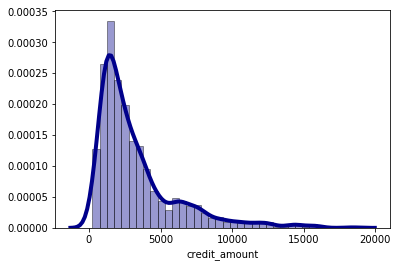

In [11]:
%matplotlib inline
import seaborn as sns
sns.distplot(german_credit['credit_amount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [47]:
import numpy as np
#applying log transformation
german_credit['credit_amount'] = np.log(german_credit['credit_amount'])

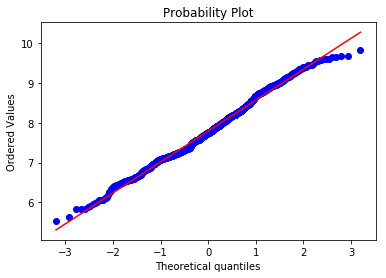

In [48]:
from scipy import stats
import matplotlib.pyplot as plt

res = stats.probplot(german_credit['credit_amount'], plot=plt)

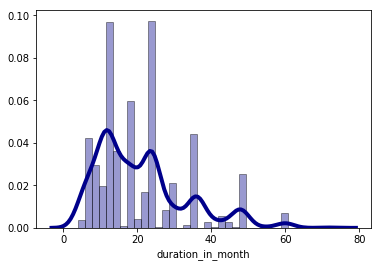

In [49]:
import seaborn as sns
sns.distplot(german_credit['duration_in_month'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [50]:
import numpy as np
german_credit['duration_in_month'] = np.log(german_credit['duration_in_month'])


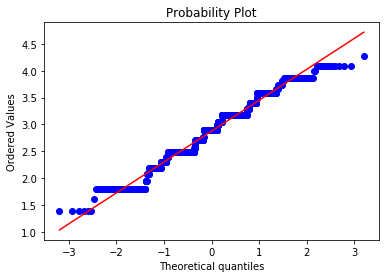

In [51]:
from scipy import stats

res = stats.probplot(german_credit['duration_in_month'], plot=plt)

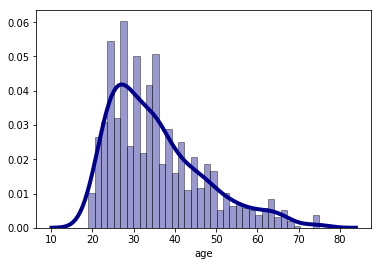

In [52]:
import seaborn as sns
sns.distplot(german_credit['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [53]:
german_credit['age'] = np.log(german_credit['age'])


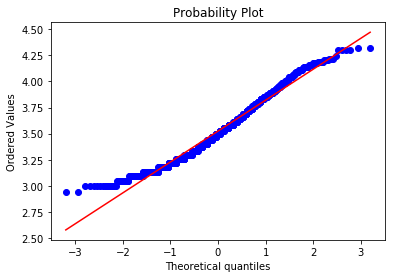

In [54]:
from scipy import stats

res = stats.probplot(german_credit['age'], plot=plt)

In [55]:
# Find correlations with the target and sort
correlations = german_credit.corr()['default'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 present_emp_since_... < 1 year                                 0.106397
credit_amount                                                  0.109570
account_check_status_0 <= ... < 200 DM                         0.119581
property_unknown / no property                                 0.125750
credit_history_all credits at this bank paid back duly         0.134448
credit_history_no credits taken/ all credits paid back duly    0.144767
savings_... < 100 DM                                           0.161007
duration_in_month                                              0.214981
account_check_status_< 0 DM                                    0.258333
default                                                        1.000000
Name: default, dtype: float64

Most Negative Correlations:
 account_check_status_no checking account                                     -0.322436
credit_history_critical account/ other credits existing (not at this bank)   -0.181713
housing_own      

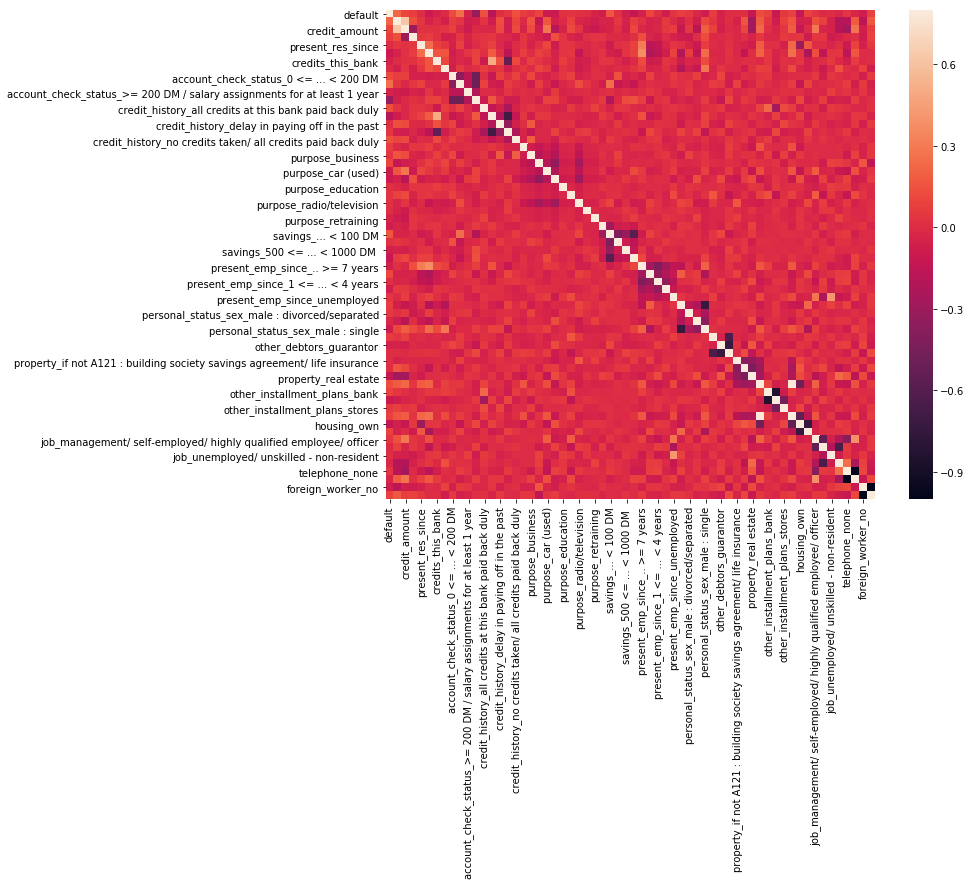

In [56]:
#correlation matrix
import matplotlib.pyplot as plt
corrmat = german_credit.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

X = german_credit.drop("default",axis=1)
y = german_credit["default"]

# Logistic Model
logistic = LogisticRegression()
logistic.fit(X,y)
mdl = SelectFromModel(logistic,prefit=True)
ix = mdl.get_support() 
data1 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) 
data1.head(n=5)

,duration_in_month,age,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,savings_unknown/ no savings account,present_emp_since_4 <= ... < 7 years,personal_status_sex_male : single,other_debtors_guarantor,property_real estate,other_installment_plans_none,housing_for free,job_unemployed/ unskilled - non-resident,"telephone_yes, registered under the customers name",foreign_worker_no
0,1.791759,4.204693,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,3.871201,3.091042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2.484907,3.891820,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3.737670,3.806662,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3.178054,3.970292,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [58]:
data1.shape

(1000, 26)

In [59]:
data1.iloc[0]

duration_in_month                                                             1.791759
age                                                                           4.204693
account_check_status_< 0 DM                                                   1.000000
account_check_status_>= 200 DM / salary assignments for at least 1 year       0.000000
account_check_status_no checking account                                      0.000000
credit_history_all credits at this bank paid back duly                        0.000000
credit_history_critical account/ other credits existing (not at this bank)    1.000000
credit_history_delay in paying off in the past                                0.000000
credit_history_no credits taken/ all credits paid back duly                   0.000000
purpose_(vacation - does not exist?)                                          0.000000
purpose_car (new)                                                             0.000000
purpose_car (used)                         

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

X = german_credit.drop("default",axis=1)
y = german_credit["default"]

#Decision Tree
decision = DecisionTreeClassifier(random_state=0)
decision.fit(X,y)
mdl = SelectFromModel(decision,prefit=True)
ix = mdl.get_support() 
data2 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) 
data2.head(n=10)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,account_check_status_< 0 DM,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,purpose_(vacation - does not exist?),purpose_car (new),savings_... < 100 DM,present_emp_since_.. >= 7 years,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,"property_if not A121/A122 : car or other, not in attribute 6"
0,1.791759,7.063904,4.0,4.0,4.204693,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.871201,8.691315,2.0,2.0,3.091042,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.484907,7.647786,2.0,3.0,3.891820,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.737670,8.972337,2.0,4.0,3.806662,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.178054,8.490849,3.0,4.0,3.970292,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,3.583519,9.111072,2.0,4.0,3.555348,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,3.178054,7.949797,3.0,4.0,3.970292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,3.583519,8.846209,2.0,2.0,3.555348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
8,2.484907,8.025843,2.0,4.0,4.110874,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.401197,8.562931,4.0,2.0,3.332205,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [61]:
data2.shape

(1000, 15)

In [62]:
data2.iloc[0]

duration_in_month                                               1.791759
credit_amount                                                   7.063904
installment_as_income_perc                                      4.000000
present_res_since                                               4.000000
age                                                             4.204693
account_check_status_< 0 DM                                     1.000000
account_check_status_no checking account                        0.000000
credit_history_all credits at this bank paid back duly          0.000000
purpose_(vacation - does not exist?)                            0.000000
purpose_car (new)                                               0.000000
savings_... < 100 DM                                            0.000000
present_emp_since_.. >= 7 years                                 1.000000
present_emp_since_... < 1 year                                  0.000000
present_emp_since_1 <= ... < 4 years               

In [63]:
from sklearn.feature_selection import RFE

mdl = RFE(logistic,n_features_to_select=8)
mdl.fit(X,y)
ix = mdl.get_support() 

data3 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) 
data3.head(n=20)

,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),savings_.. >= 1000 DM,other_debtors_guarantor,foreign_worker_no
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
data3.shape

(1000, 8)

In [65]:
data3.iloc[0]

account_check_status_>= 200 DM / salary assignments for at least 1 year    0.0
account_check_status_no checking account                                   0.0
credit_history_all credits at this bank paid back duly                     0.0
credit_history_no credits taken/ all credits paid back duly                0.0
purpose_(vacation - does not exist?)                                       0.0
savings_.. >= 1000 DM                                                      0.0
other_debtors_guarantor                                                    0.0
foreign_worker_no                                                          0.0
Name: 0, dtype: float64

In [66]:
from sklearn.feature_selection import RFE

mdl = RFE(decision,n_features_to_select=8)
mdl.fit(X,y)
ix = mdl.get_support() 

data4 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) 
data4.head(n=20)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,account_check_status_no checking account,purpose_car (new)
0,1.791759,7.063904,4.0,4.0,4.204693,2.0,0.0,0.0
1,3.871201,8.691315,2.0,2.0,3.091042,1.0,0.0,0.0
2,2.484907,7.647786,2.0,3.0,3.891820,1.0,1.0,0.0
3,3.737670,8.972337,2.0,4.0,3.806662,1.0,0.0,0.0
4,3.178054,8.490849,3.0,4.0,3.970292,2.0,0.0,1.0
5,3.583519,9.111072,2.0,4.0,3.555348,1.0,1.0,0.0
6,3.178054,7.949797,3.0,4.0,3.970292,1.0,1.0,0.0
7,3.583519,8.846209,2.0,2.0,3.555348,1.0,0.0,0.0
8,2.484907,8.025843,2.0,4.0,4.110874,1.0,1.0,0.0
9,3.401197,8.562931,4.0,2.0,3.332205,2.0,0.0,1.0


In [67]:
data4.iloc[0]

duration_in_month                           1.791759
credit_amount                               7.063904
installment_as_income_perc                  4.000000
present_res_since                           4.000000
age                                         4.204693
credits_this_bank                           2.000000
account_check_status_no checking account    0.000000
purpose_car (new)                           0.000000
Name: 0, dtype: float64

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = german_credit.drop("default",axis=1)
y = german_credit["default"]


mdlsel = SelectKBest(f_regression, k=8) 

mdlsel.fit(X,y)
ix = mdlsel.get_support() 
data5 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
data5.head(n=7)

,duration_in_month,account_check_status_< 0 DM,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_no credits taken/ all credits paid back duly,savings_... < 100 DM,housing_own
0,1.791759,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,3.871201,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2.484907,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,3.737670,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.178054,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3.583519,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,3.178054,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [69]:
data5.iloc[0]

duration_in_month                                                             1.791759
account_check_status_< 0 DM                                                   1.000000
account_check_status_no checking account                                      0.000000
credit_history_all credits at this bank paid back duly                        0.000000
credit_history_critical account/ other credits existing (not at this bank)    1.000000
credit_history_no credits taken/ all credits paid back duly                   0.000000
savings_... < 100 DM                                                          0.000000
housing_own                                                                   1.000000
Name: 0, dtype: float64

In [70]:
#SelectKBest
#F_regression 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = german_credit.drop("default",axis=1)
y = german_credit["default"]

mdlsel = SelectKBest(chi2, k=8) 


mdlsel.fit(X,y)
ix = mdlsel.get_support() 
data6 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
data6.head(n=7)

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_no credits taken/ all credits paid back duly,savings_unknown/ no savings account,property_unknown / no property
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data6.iloc[0]

account_check_status_0 <= ... < 200 DM                                        0.0
account_check_status_< 0 DM                                                   1.0
account_check_status_no checking account                                      0.0
credit_history_all credits at this bank paid back duly                        0.0
credit_history_critical account/ other credits existing (not at this bank)    1.0
credit_history_no credits taken/ all credits paid back duly                   0.0
savings_unknown/ no savings account                                           1.0
property_unknown / no property                                                0.0
Name: 0, dtype: float64

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

In [73]:
X_train, X_test, y_train, y_test = train_test_split(german_credit.drop("default", axis=1), german_credit["default"], test_size=0.3)

In [74]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
            ('clf', svm.SVC(random_state=42))])

#Neural Networks
pipe_mlp = Pipeline([('scl', StandardScaler()),
            ('clf', MLPClassifier())])

#https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
#Gradient Boosting Classifier
#pipe_boosting = Pipeline([('scl', StandardScaler()),
#			('clf', GradientBoostingClassifier(random_state=1))])
#pipe_boosting.steps

In [75]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

grid_params_mlp = [{'clf__batch_size': ['auto']}]


parameters_gradient = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
parameters_tree = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }

In [76]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_mlp = GridSearchCV(estimator=pipe_mlp,
			param_grid=grid_params_mlp,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

clf = GridSearchCV(GradientBoostingClassifier(), parameters_gradient, cv=10, n_jobs=-1)

gsearch = GridSearchCV(tree.DecisionTreeClassifier(), parameters_tree)

In [77]:
# List of pipelines for ease of iteration
#grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]
grids = [gs_lr, gs_rf, gs_svm,gs_mlp,clf,gsearch]

# Dictionary of pipelines and classifier types for ease of reference
"""grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA', 
		4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}"""

grid_dict = {0: 'Logistic Regression', 
		1: 'Random Forest', 
		2: 'Support Vector Machine',
        3: 'Neural Networks',
        4: 'Gradient Boosting',
        5: 'Decision Tree' }

In [ ]:
# Fit the grid search objects
import warnings
import time
warnings.filterwarnings('ignore')
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
program_starts = time.time()
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    now = time.time()
    print("It has been {0} seconds since the loop started".format(now - program_starts))
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.747
Test set accuracy score for best params: 0.750 
It has been 0.9442119598388672 seconds since the loop started

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5}
Best training accuracy: 0.770
Test set accuracy score for best params: 0.760 
It has been 215.64873814582825 seconds since the loop started

Estimator: Support Vector Machine
Best params: {'clf__C': 2, 'clf__kernel': 'rbf'}
Best training accuracy: 0.759
Test set accuracy score for best params: 0.760 
It has been 245.75484895706177 seconds since the loop started

Estimator: Neural Networks
Best params: {'clf__batch_size': 'auto'}
Best training accuracy: 0.711
Test set accuracy score for best params: 0.730 
It has been 253.78325414657593 seconds since the loop sta

In [15]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
X3=german_credit.drop("default",axis=1)
Y3=german_credit["default"]
logit_model3=sm.Logit(Y3,X3)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

0.782

In [18]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = german_credit.drop("default",axis=1)
Y3_test = german_credit["default"]

Y3test_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [19]:
# Model's in sample AUC

from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
roc_auc_score(y_true, y_scores)

0.7061904761904761

ROC AUC: 0.832


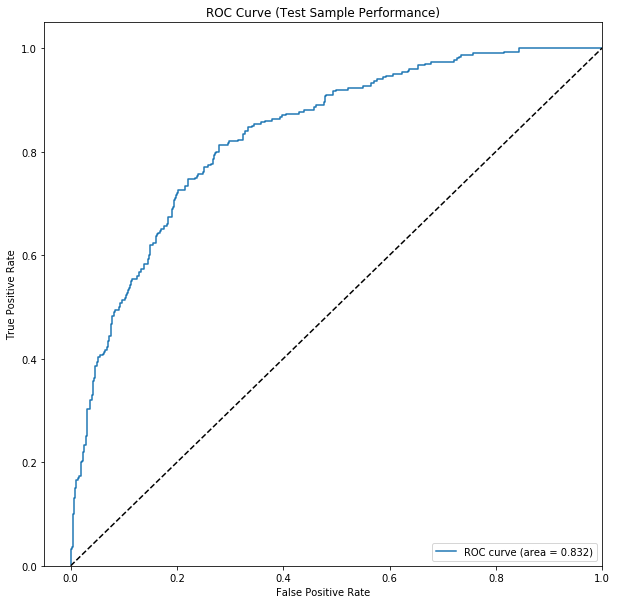

In [20]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python